# KDT_DeepLearning_Day3_Assignment
---


## 1. 자동 완성 문장 데이터 RNN, LSTM, GRU 모델 구현하기
- 번호가 매겨진 부분의 코드를 완성하시면 됩니다.

In [1]:
import numpy as np
import tensorflow as tf

# 자동완성을 위한 문장 데이터
sentences = [
    "나는 영어 공부를 좋아한다",
    "그는 만화책을 보며 웃었다",
    "그녀는 여행 계획을 짜고 있었다"
]
# === 아래 코드를 완성하세요 ===
# 번호가 매겨진 부분의 코드를 완성하시면 됩니다.

# 1. 문장을 단어로 분할하고 단어를 정수로 변환
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentences) #단순 토크나이저
sequences = tokenizer.texts_to_sequences(sentences)


# 2. 입력 시퀀스와 그에 상응하는 타겟 단어 생성
def generate_data(sequences):
    max_length = max(len(seq) for seq in sequences)
    X = []
    y = []
    for seq in sequences:
        for i in range(1, len(seq)):
            padded_seq = seq[:i] + [0] * (max_length - i)  # 패딩 추가, 모든 입력 시퀀스가 동일한 길이가 되도록 만드는 과정.
            X.append(padded_seq)
            y.append(seq[i])
    return np.array(X), np.array(y)

# 3. 데이터 생성
X_train, y_train = generate_data(sequences)

# 4. 모델 정의 함수
def build_model(cell_type):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=10), # 임베딩 : 시퀀스 데이터를 타임스텝으로 나누는 과정. 이 코드는 단어 단위로 나눔.
        tf.keras.layers.Dropout(0.2),  # 드롭아웃 추가
        cell_type(units=16),
        tf.keras.layers.Dense(units=len(tokenizer.word_index)+1, activation='softmax')
    ])
    return model

# 5. 모델 컴파일 함수
def compile_and_train_model(model, X_train, y_train):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)
    return history

# 6. SimpleRNN 모델 생성 및 학습
print("Training SimpleRNN model...")
rnn_model = build_model(tf.keras.layers.SimpleRNN)
rnn_history = compile_and_train_model(rnn_model, X_train, y_train)

# 7. LSTM 모델 생성 및 학습
print("Training LSTM model...")
lstm_model = build_model(tf.keras.layers.LSTM)
lstm_history = compile_and_train_model(lstm_model, X_train, y_train)

# 8. GRU 모델 생성 및 학습
print("Training GRU model...")
gru_model = build_model(tf.keras.layers.GRU)
gru_history = compile_and_train_model(gru_model, X_train, y_train)

# 출력할 epoch 설정
print_interval = 10

# epoch 마다 결과 출력
for epoch in range(1, 51):
    if epoch % print_interval == 0:
        print(f"\nEpoch {epoch} Results:")
        print("SimpleRNN - Loss:", rnn_history.history['loss'][epoch-1], "- Accuracy:", rnn_history.history['accuracy'][epoch-1])
        print("LSTM - Loss:", lstm_history.history['loss'][epoch-1], "- Accuracy:", lstm_history.history['accuracy'][epoch-1])
        print("GRU - Loss:", gru_history.history['loss'][epoch-1], "- Accuracy:", gru_history.history['accuracy'][epoch-1])

# 예측 결과 출력
print("\nPrediction Results:")

# 자동완성을 위한 입력 문장
input_sentence = "나는"

# 9. 입력 문장을 정수 시퀀스로 변환
input_seq = tokenizer.texts_to_sequences([input_sentence])[0]
max_length = max(len(seq) for seq in sequences)
input_seq = [0] * ( - len(input_seq)) + input_seq

# SimpleRNN 모델 예측
predicted_index_rnn = np.argmax(rnn_model.predict(np.array([input_seq])))
predicted_word_rnn = tokenizer.index_word[predicted_index_rnn]

# LSTM 모델 예측
predicted_index_lstm = np.argmax(lstm_model.predict(np.array([input_seq])))
predicted_word_lstm = tokenizer.index_word[predicted_index_lstm]

# GRU 모델 예측
predicted_index_gru = np.argmax(gru_model.predict(np.array([input_seq])))
predicted_word_gru = tokenizer.index_word[predicted_index_gru]

# 예측된 단어 출력
print("SimpleRNN Prediction:", predicted_word_rnn)
print("LSTM Prediction:", predicted_word_lstm)
print("GRU Prediction:", predicted_word_gru)


Training SimpleRNN model...
Training LSTM model...
Training GRU model...

Epoch 10 Results:
SimpleRNN - Loss: 2.5494179725646973 - Accuracy: 0.20000000298023224
LSTM - Loss: 2.629819631576538 - Accuracy: 0.10000000149011612
GRU - Loss: 2.624474048614502 - Accuracy: 0.10000000149011612

Epoch 20 Results:
SimpleRNN - Loss: 2.4487128257751465 - Accuracy: 0.4000000059604645
LSTM - Loss: 2.611917495727539 - Accuracy: 0.20000000298023224
GRU - Loss: 2.605255603790283 - Accuracy: 0.10000000149011612

Epoch 30 Results:
SimpleRNN - Loss: 2.317711353302002 - Accuracy: 0.30000001192092896
LSTM - Loss: 2.5954396724700928 - Accuracy: 0.30000001192092896
GRU - Loss: 2.5740809440612793 - Accuracy: 0.20000000298023224

Epoch 40 Results:
SimpleRNN - Loss: 2.1217947006225586 - Accuracy: 0.6000000238418579
LSTM - Loss: 2.5596985816955566 - Accuracy: 0.30000001192092896
GRU - Loss: 2.541351795196533 - Accuracy: 0.20000000298023224

Epoch 50 Results:
SimpleRNN - Loss: 1.9028546810150146 - Accuracy: 0.60000

In [2]:
import numpy as np
import tensorflow as tf

# 더 긴 문장 데이터

sentences = [
    "나는 오늘 카페에서 새로운 책을 읽었다. 책을 읽는 동안 향긋한 커피 향에 취해 버렸다. 그리고 카페에서 우연히 예전에 못 만난 친구를 만나게 되었다. 오랜만에 만나서 정말 반가웠다.",
    "어제는 비가 내려서 집에서 영화를 보는 시간을 가졌어요. 좋아하는 영화를 즐기며 편안한 시간을 보냈습니다. 그리고 나서는 집에서 파스타를 만들어 먹었어요. 집 안의 포근한 분위기가 정말 좋았어요.",
    "저는 엊그제 박물관에 방문하여 전시회를 관람했습니다. 예술작품들을 감상하면서 시간이 어떻게 지나갔는지 모르겠었어요. 그 후에는 근처 카페에서 차 한 잔 마시며 여유를 즐겼습니다."
]

# === 아래 코드를 완성하세요 ===
# 번호가 매겨진 부분의 코드를 완성하시면 됩니다.

# 1. 문장을 단어로 분할하고 단어를 정수로 변환
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences =tokenizer.texts_to_sequences(sentences)

# 2. 입력 시퀀스와 그에 상응하는 타겟 단어 생성
def generate_data(sequences):
    max_length = max(len(seq) for seq in sequences)
    X = []
    y = []
    for seq in sequences:
        for i in range(1, len(seq)):
            padded_seq = seq[:i] + [0] * (max_length - i)  # 패딩 추가
            X.append(padded_seq)
            y.append(seq[i])
    return np.array(X), np.array(y)

# 3. 데이터 생성
X_train, y_train = generate_data(sequences)

# 4. 모델 정의 함수
def build_rnn_model(cell_type):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=10),
        tf.keras.layers.Dropout(0.2),  # 드롭아웃 추가
        cell_type(units=16),
        tf.keras.layers.Dense(units=len(tokenizer.word_index)+1, activation='softmax')
    ])
    return model

# 5. LSTM 모델 정의 함수
def build_lstm_model(cell_type):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=10),
        tf.keras.layers.Dropout(0.2),  # 드롭아웃 추가
        tf.keras.layers.LSTM(units=32, return_sequences=True),  # 첫 번째 LSTM 층
        tf.keras.layers.LSTM(units=32, return_sequences=False),  # 두 번째 LSTM 층
        tf.keras.layers.Dense(units=len(tokenizer.word_index)+1, activation='softmax')
    ])
    return model

# 6. GRU 모델 정의 함수
def build_gru_model(cell_type):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=10),
        tf.keras.layers.Dropout(0.2),  # 드롭아웃 추가
        tf.keras.layers.GRU(units=32, return_sequences=True),  # GRU 층 추가
        tf.keras.layers.GRU(units=32),  # 추가된 GRU 층
        tf.keras.layers.Dense(units=len(tokenizer.word_index)+1, activation='softmax')
    ])
    return model

epochs = 10
# 7. 모델 컴파일 함수 (Adam 옵티마이저 사용)
def compile_and_train_model(model, X_train, y_train, learning_rate, epochs):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=8, verbose=0)
    return history

# 8. SimpleRNN 모델 생성 및 학습
print("Training SimpleRNN model...")
rnn_model = build_rnn_model(tf.keras.layers.SimpleRNN)
rnn_history = compile_and_train_model(rnn_model, X_train, y_train, 0.01, epochs)

# 9. LSTM 모델 생성 및 학습 (learning_rate = 0.001 사용)
print("Training LSTM model...")
lstm_model = build_lstm_model(tf.keras.layers.LSTM)
lstm_history = compile_and_train_model(lstm_model, X_train, y_train, 0.001, epochs)

# 10. GRU 모델 생성 및 학습 (learning_rate = 0.001 사용)
print("Training GRU model...")
gru_model = build_gru_model(tf.keras.layers.GRU)
gru_history = compile_and_train_model(gru_model, X_train, y_train, 0.001, epochs)

# 출력할 epoch 설정
print_interval = 200

# epoch 마다 결과 출력
for epoch in range(1, epochs+1):
    if epoch % print_interval == 0:
        print(f"\nEpoch {epoch} Results:")
        print("SimpleRNN - Loss:", rnn_history.history['loss'][epoch-1], "- Accuracy:", rnn_history.history['accuracy'][epoch-1])
        print("LSTM - Loss:", lstm_history.history['loss'][epoch-1], "- Accuracy:", lstm_history.history['accuracy'][epoch-1])
        print("GRU - Loss:", gru_history.history['loss'][epoch-1], "- Accuracy:", gru_history.history['accuracy'][epoch-1])

# 예측 결과 출력
print("\nPrediction Results:")

# 자동완성을 위한 입력 문장
input_list = ["나는", "저는", "어제는"]
for input_sentence in input_list:
  # 입력 문장을 정수 시퀀스로 변환
  input_seq = tokenizer.texts_to_sequences([input_sentence])[0]
  max_length = max(len(seq) for seq in sequences)
  input_seq = [0] * (max_length - len(input_seq)) + input_seq

  # SimpleRNN 모델 예측
  predicted_index_rnn = np.argmax(rnn_model.predict(np.array([input_seq])))
  predicted_word_rnn = tokenizer.index_word[predicted_index_rnn]

  # LSTM 모델 예측
  predicted_index_lstm = np.argmax(lstm_model.predict(np.array([input_seq])))
  predicted_word_lstm = tokenizer.index_word[predicted_index_lstm]

  # GRU 모델 예측
  predicted_index_gru = np.argmax(gru_model.predict(np.array([input_seq])))
  predicted_word_gru = tokenizer.index_word[predicted_index_gru]

  print("input_sentence:", input_sentence)
  # 예측된 단어 출력
  print("SimpleRNN Prediction:", predicted_word_rnn)
  print("LSTM Prediction:", predicted_word_lstm)
  print("GRU Prediction:", predicted_word_gru)


Training SimpleRNN model...
Training LSTM model...
Training GRU model...

Prediction Results:
1/1 [==============================] - 1s 557ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step
input_sentence: 나는
SimpleRNN Prediction: 영화를
LSTM Prediction: 카페에서
GRU Prediction: 카페에서
1/1 [==============================] - 0s 41ms/step
input_sentence: 저는
SimpleRNN Prediction: 영화를
LSTM Prediction: 카페에서
GRU Prediction: 카페에서
1/1 [==============================] - 0s 43ms/step
input_sentence: 어제는
SimpleRNN Prediction: 영화를
LSTM Prediction: 카페에서
GRU Prediction: 카페에서


## 주가 예측 LSTM 모델 구현하기
- 번호가 매겨진 부분의 코드를 완성하시면 됩니다.

In [3]:
!pip install finance-datareader

import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

df = fdr.DataReader('005930', '2018-05-04', '2020-01-22')
df.head()

dfx = df[['Open','High','Low','Volume', 'Close']]

for col in dfx.columns:
    scaler = MinMaxScaler()
    dfx[col] = scaler.fit_transform(dfx[[col]])
dfy = dfx[['Close']]    # 주식 종가
dfx = dfx[['Open','High','Low','Volume']]

x = dfx.values.tolist()
y = dfy.values.tolist()

# 5일동안의 종가로 다음날 종가 예측
window_size = 5
data_x, data_y = [], []

for i in range(len(y) - window_size):
    _x = x[i:i+window_size]
    _y = y[i+window_size]
    data_x.append(_x)
    data_y.append(_y)

train_size = int(len(data_y) * 0.8)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_x.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_x.shape, test_y.shape)

훈련 데이터의 크기 : (332, 5, 4) (332, 1)
테스트 데이터의 크기 : (84, 5, 4) (84, 1)


<ipython-input-3-932201bcfb1c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[col] = scaler.fit_transform(dfx[[col]])
<ipython-input-3-932201bcfb1c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[col] = scaler.fit_transform(dfx[[col]])
<ipython-input-3-932201bcfb1c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [4]:
# === 아래 코드를 구현하세요 ===
# 1. LSTM 모델을 사용하고, unit = 20, tanh 활성화 함수 사용, 적절한 input_shape을 지정합니다.
# 2. 출력층을 정의합니다.
# 3. SGD 옵티마이저를 사용하고 mse 손실함수를 사용합니다.
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units=20,activation='tanh',input_shape=(5,4)))
model.add(Dense(1))

model.compile(optimizer='SGD', loss='mean_squared_error')

Epoch 1/100
11/11 [==============================] - 13s 10ms/step - loss: 0.1631
Epoch 2/100
11/11 [==============================] - 0s 11ms/step - loss: 0.0710
Epoch 3/100
11/11 [==============================] - 0s 10ms/step - loss: 0.0371
Epoch 4/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0247
Epoch 5/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0202
Epoch 6/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0184
Epoch 7/100
11/11 [==============================] - 0s 13ms/step - loss: 0.0175
Epoch 8/100
11/11 [==============================] - 0s 13ms/step - loss: 0.0170
Epoch 9/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0167
Epoch 10/100
11/11 [==============================] - 0s 14ms/step - loss: 0.0165
Epoch 11/100
11/11 [==============================] - 0s 22ms/step - loss: 0.0162
Epoch 12/100
11/11 [==============================] - 0s 14ms/step - loss: 0.0160
Epoch 13/100
11/11 [====

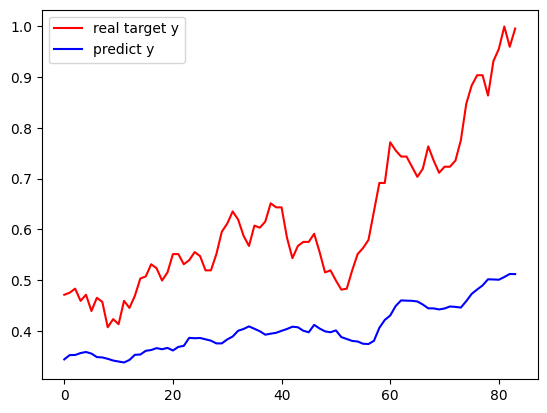

In [5]:
# 학습
model.fit(train_x, train_y, epochs=100)

# 예측 결과 시각화
pred_y = model.predict(test_x)
plt.figure()
plt.plot(test_y, color='red', label='real target y')
plt.plot(pred_y, color='blue', label='predict y')
plt.legend()
plt.show()

In [6]:
# === 아래 코드를 구현하세요 ===
# 1. LSTM 첫번째 층은 unit 20, relu 함수 사용, return_sequences를 활용해 시퀀스의 모든 요소의 값을 반환하도록 설정, input_shape을 적절히 설정합니다.
# 2. LSTM 두번째 층은 unit 40, relu 함수 사용, return_sequences를 활용해 시퀀스의 모든 요소의 값을 반환하도록 설정 합니다.
# 3. LSTM 세번째 층은 unit 20, relu 함수 사용, return_sequences를 활용해 시퀀스의 마지막 타임스템프의 결과값만 반환 합니다.
# 4. 출력층을 정의합니다.
# 5. adam 옵티마이저 사용, mse 손실함수 사용.

model2 = Sequential()
model2.add(LSTM(units=20,activation='relu',return_sequences=True,input_shape=(5,4)))
model2.add(LSTM(units=40,activation='relu',return_sequences = True))
model2.add(LSTM(units=20, activation='relu', return_sequences = False)) # return_sequences : 기본값(false) 시퀀스의 마지막 타임스템프 결과값만 반환. (true인 경우 모든 타임스템프 결과값 반환)
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mean_squared_error')

In [7]:
# 모델 확인하기
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 20)             2000      
                                                                 
 lstm_5 (LSTM)               (None, 5, 40)             9760      
                                                                 
 lstm_6 (LSTM)               (None, 20)                4880      
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 16661 (65.08 KB)
Trainable params: 16661 (65.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
11/11 [==============================] - 10s 21ms/step - loss: 0.0914
Epoch 2/100
11/11 [==============================] - 0s 20ms/step - loss: 0.0656
Epoch 3/100
11/11 [==============================] - 0s 24ms/step - loss: 0.0333
Epoch 4/100
11/11 [==============================] - 0s 22ms/step - loss: 0.0089
Epoch 5/100
11/11 [==============================] - 0s 23ms/step - loss: 0.0083
Epoch 6/100
11/11 [==============================] - 0s 17ms/step - loss: 0.0066
Epoch 7/100
11/11 [==============================] - 0s 21ms/step - loss: 0.0056
Epoch 8/100
11/11 [==============================] - 0s 17ms/step - loss: 0.0049
Epoch 9/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0040
Epoch 10/100
11/11 [==============================] - 0s 15ms/step - loss: 0.0033
Epoch 11/100
11/11 [==============================] - 0s 21ms/step - loss: 0.0030
Epoch 12/100
11/11 [==============================] - 0s 26ms/step - loss: 0.0028
Epoch 13/100
11/11 [====

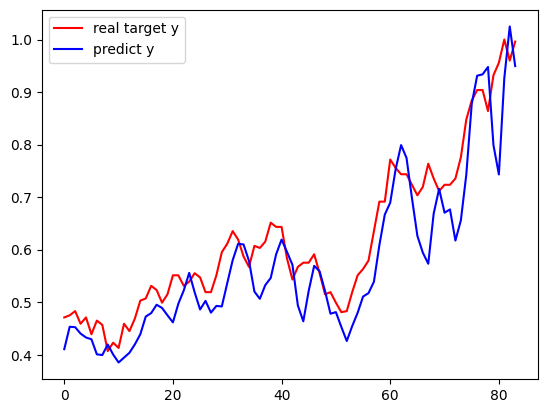

In [8]:
# 모델 훈련
model2.fit(train_x, train_y, epochs=100)

# 예측 결과 시각화
pred_y = model2.predict(test_x)

plt.figure()
plt.plot(test_y, color='red', label='real target y')
plt.plot(pred_y, color='blue', label='predict y')
plt.legend()
plt.show()

## 심화 과제 ) 아래 3가지 선택지 중 하나를 선택해서 시도해보기

1. 한국어 -> 영어 간단한 번역 모델 만들어보기, 리서치를 충분히 해보고, 아주 간단한 데이터라도 테스트한 과정이 있으면 실패해도 괜찮음.
2. 간단한 문장 분류 모델(긍정or부정, 감정분류 등) 만들어보기, 리서치를 충분히 해보고, 아주 간단한 데이터라도 테스트한 과정이 있으면 실패해도 괜찮음.

3. 아래 데이터를 활용해 주가예측 모델 만들기
- 데이터 : https://www.kaggle.com/competitions/jpx-tokyo-stock-exchange-prediction/data

In [9]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [10]:
!pip install ratsnlp

In [15]:
from Korpora import Korpora
nsmc = Korpora.load('nsmc',force_download=True) #네이버 영화 리뷰 NSMC


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : e9t@github
    Repository : https://github.com/e9t/nsmc
    References : www.lucypark.kr/docs/2015-pyconkr/#39

    Naver sentiment movie corpus v1.0
    This is a movie review dataset in the Korean language.
    Reviews were scraped from Naver Movies.

    The dataset construction is based on the method noted in
    [Large movie review dataset][^1] from Maas et al., 2011.

    [^1]: http://ai.stanford.edu/~amaas/data/sentiment/

    # License
    CC0 1.0 Universal (CC0 1.0) Public Domain Dedication
    Details in https://creativecommons.org/publicdomain/zero/1.0/



[nsmc] download ratings_train.txt: 14.6MB [00:00, 76.7MB/s]                           
[nsmc] download ratings_test.txt: 4.90MB [00:00, 37.2MB/s]                           


In [210]:
print(nsmc.train) #texts와 labels로 되어있음
t_size = 1000
train_feat = nsmc.train.texts[:t_size]
train_label = nsmc.train.labels[:t_size]
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(train_feat)
sequences = tokenizer.texts_to_sequences(train_feat)

NSMC.train: size=150000
  - NSMC.train.texts : list[str]
  - NSMC.train.labels : list[int]



In [211]:
max_length = max(len(seq) for seq in sequences)
print(max_length)
print(tokenizer.word_index)

38
{'영화': 1, '정말': 2, '진짜': 3, '너무': 4, '이': 5, '그냥': 6, '다': 7, '왜': 8, '더': 9, '보고': 10, '없다': 11, '없는': 12, '본': 13, '잘': 14, '영화가': 15, '완전': 16, '그': 17, '최고의': 18, 'ㅋㅋ': 19, '아': 20, '좀': 21, '연기': 22, '수': 23, '또': 24, '하는': 25, '솔직히': 26, '있는': 27, '이건': 28, 'ㅠㅠ': 29, '이런': 30, '영화는': 31, '내가': 32, '하고': 33, '역시': 34, '아깝다': 35, '참': 36, '최고': 37, '난': 38, '작품': 39, '영화를': 40, '이거': 41, 'ㅋㅋㅋ': 42, '스토리도': 43, '무슨': 44, '그리고': 45, '하나': 46, '평점': 47, '넘': 48, '다시': 49, '없고': 50, '영화다': 51, '재밌게': 52, '시간이': 53, '내': 54, '좋은': 55, '평점이': 56, '듯': 57, '보는': 58, '근데': 59, '쓰레기': 60, '이게': 61, '많이': 62, '어떻게': 63, 'ㅎㅎ': 64, '봤는데': 65, '재미도': 66, '재미': 67, '나름': 68, 'ㅡㅡ': 69, '하나도': 70, '재미있게': 71, '전혀': 72, '드라마': 73, '건': 74, '재미없다': 75, '아닌': 76, '재밌는데': 77, '이렇게': 78, '내용도': 79, '제일': 80, '줄': 81, '느낌': 82, '한': 83, '진심': 84, '아주': 85, '요즘': 86, '와': 87, '액션': 88, '개': 89, '스토리': 90, '보면': 91, '가장': 92, '절대': 93, '않는': 94, '있고': 95, '별로': 96, '좋았어요': 97, '모르겠다': 98, '10점': 99, 'ㅋ

In [212]:
from tensorflow import keras

train_labels = train_label
from tensorflow.keras.layers import SimpleRNN,Dense

# LSTM 모델 정의 함수
def build_lstm_model():
    model = Sequential()

    model.add(SimpleRNN(16, input_shape=(max_length,1), activation='relu'))

    model.add(Dense(8, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    return model

epochs = 100
# 모델 컴파일 함수
def compile_and_train_model(model, X_train, y_train, learning_rate, epochs):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=losses.BinaryCrossentropy(), metrics=['accuracy'])
    print('pass')
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=8, verbose=0)
    return history
def generate_data(sequences):
    max_length = max(len(seq) for seq in sequences)
    X = []
    y = []
    for seq in sequences:
        for i in range(1, len(seq)):
            padded_seq = seq[:i] + [0] * (max_length - i)  # 패딩 추가
            y.append(seq[i])
        X.append(padded_seq)

    return np.array(X), np.array(y)
train_feats, train_labels = generate_data(sequences)


In [213]:
print(train_feats.shape)
print(train_labels.shape)

(1000, 38)
(6950,)


In [214]:
t_labels = nsmc.train.labels[:t_size]

In [215]:
print("Training LSTM model...")
lstm_model = build_lstm_model()
train_feats = train_feats.reshape(train_feats.shape[0],train_feats.shape[1],1)
lstm_history = compile_and_train_model(lstm_model, train_feats, np.array(t_labels), 0.001, epochs)

Training LSTM model...
pass


In [216]:
print(lstm_history)

In [220]:
input_list = ["좋아!", "그냥 그래", "싫어", "개별로"]
for input_sentence in input_list:
  # 입력 문장을 정수 시퀀스로 변환
  input_seq = tokenizer.texts_to_sequences([input_sentence])[0]
  max_length = max(len(seq) for seq in sequences)
  input_seq = [0] * (max_length - len(input_seq)) + input_seq
  print(lstm_model.predict(np.array([input_seq])))
  if lstm_model.predict(np.array([input_seq])) >= 0.4:
    predicted_word_lstm = '부정'
  else:
    predicted_word_lstm = '긍정'

  print("input_sentence:", input_sentence)
  # 예측된 단어 출력
  print("LSTM Prediction:", predicted_word_lstm)


1/1 [==============================] - 0s 39ms/step
[[0.00231509]]
1/1 [==============================] - 0s 40ms/step
input_sentence: 좋아!
LSTM Prediction: 긍정
1/1 [==============================] - 0s 41ms/step
[[4.7634034e-23]]
1/1 [==============================] - 0s 36ms/step
input_sentence: 그냥 그래
LSTM Prediction: 긍정
1/1 [==============================] - 0s 79ms/step
[[0.48926404]]
1/1 [==============================] - 0s 46ms/step
input_sentence: 싫어
LSTM Prediction: 부정
1/1 [==============================] - 0s 26ms/step
[[0.48926404]]
1/1 [==============================] - 0s 25ms/step
input_sentence: 개별로
LSTM Prediction: 부정


In [227]:
input_list = ["재미있다", "별론데?", "도대체 이딴걸 왜 만듬?", "안졸리고 재미있게 봤음"]


for input_sentence in input_list:
  # 입력 문장을 정수 시퀀스로 변환
  input_seq = tokenizer.texts_to_sequences([input_sentence])[0]
  max_length = max(len(seq) for seq in sequences)
  input_seq = [0] * (max_length - len(input_seq)) + input_seq
  print(lstm_model.predict(np.array([input_seq])))
  if lstm_model.predict(np.array([input_seq])) >= 0.4:
    predicted_word_lstm = '부정'
  else:
    predicted_word_lstm = '긍정'

  print("input_sentence:", input_sentence)
  # 예측된 단어 출력
  print("LSTM Prediction:", predicted_word_lstm)


1/1 [==============================] - 0s 104ms/step
[[0.00030928]]
1/1 [==============================] - 0s 84ms/step
input_sentence: 재미있다
LSTM Prediction: 긍정
1/1 [==============================] - 0s 90ms/step
[[0.48926404]]
1/1 [==============================] - 0s 112ms/step
input_sentence: 별론데?
LSTM Prediction: 부정
1/1 [==============================] - 0s 41ms/step
[[0.691629]]
1/1 [==============================] - 0s 26ms/step
input_sentence: 도대체 이딴걸 왜 만듬?
LSTM Prediction: 부정
1/1 [==============================] - 0s 29ms/step
[[0.00020534]]
1/1 [==============================] - 0s 32ms/step
input_sentence: 안졸리고 재미있게 봤음
LSTM Prediction: 긍정


In [231]:
input_list = ["간만에 볼만한 거 봤음", "누구 머리에서 나온거냐", "하나도 이해 안되고 졸리기만함", "나름 노력한거 같음"]


for input_sentence in input_list:
  # 입력 문장을 정수 시퀀스로 변환
  input_seq = tokenizer.texts_to_sequences([input_sentence])[0]
  max_length = max(len(seq) for seq in sequences)
  input_seq = [0] * (max_length - len(input_seq)) + input_seq
  print(lstm_model.predict(np.array([input_seq])))
  if lstm_model.predict(np.array([input_seq])) >= 0.4:
    predicted_word_lstm = '부정'
  else:
    predicted_word_lstm = '긍정'

  print("input_sentence:", input_sentence)
  # 예측된 단어 출력
  print("LSTM Prediction:", predicted_word_lstm)

1/1 [==============================] - 0s 32ms/step
[[0.]]
1/1 [==============================] - 0s 41ms/step
input_sentence: 간만에 볼만한 거 봤음
LSTM Prediction: 긍정
1/1 [==============================] - 0s 40ms/step
[[0.48926404]]
1/1 [==============================] - 0s 39ms/step
input_sentence: 누구 머리에서 나온거냐
LSTM Prediction: 부정
1/1 [==============================] - 0s 47ms/step
[[0.80860704]]
1/1 [==============================] - 0s 51ms/step
input_sentence: 하나도 이해 안되고 졸리기만함
LSTM Prediction: 부정
1/1 [==============================] - 0s 48ms/step
[[0.00095124]]
1/1 [==============================] - 0s 51ms/step
input_sentence: 나름 노력한거 같음
LSTM Prediction: 긍정
